In [1]:
import rasterio
import numpy as np
from scipy import stats

def read_classified_images(file_paths):
    images = []
    for file_path in file_paths:
        with rasterio.open(file_path) as src:
            images.append(src.read(1))  # Assuming the classification is in the first band
    return np.array(images)

def create_majority_class_image(images):
    # Calculate the mode along the first axis (across the four images)
    mode_result, _ = stats.mode(images, axis=0)
    return mode_result.squeeze()  # Remove the extra dimension added by mode calculation

def save_classified_image(image, reference_file, output_file):
    with rasterio.open(reference_file) as src:
        meta = src.meta.copy()
        # Ensure the count is 1 since we're writing a single band
        meta.update(count=1)
        
    print(f"Image shape to be saved: {image.shape}")
    print(f"Metadata: {meta}")

    with rasterio.open(output_file, 'w', **meta) as dst:
        dst.write(image, 1)

# Usage example
classified_files = [
    'sample_output_filtered_classified_image_RF.tif',
    'sample_output_filtered_classified_image_SVM.tif',
    'sample_output_filtered_classified_image_XGB.tif'
    # ,'sample_output_filtered_classified_image_NN.tif'
]

output_file = 'Ensembled_output.tif'

# Read classified images
classified_images = read_classified_images(classified_files)
print(f"Shape of classified_images array: {classified_images.shape}")
print("Converted to array")

# Create majority class image
majority_class_image = create_majority_class_image(classified_images)
print(f"Shape of majority_class_image after mode calculation: {majority_class_image.shape}")

# Ensure majority_class_image has the correct shape for writing
# The majority_class_image should already have the correct shape
print(f"Shape of majority_class_image after squeezing: {majority_class_image.shape}")

# Save the final classified image
save_classified_image(majority_class_image, classified_files[0], output_file)
print("Ensemble saved")

Shape of classified_images array: (3, 2743, 3245)
Converted to array
Shape of majority_class_image after mode calculation: (2743, 3245)
Shape of majority_class_image after squeezing: (2743, 3245)
Image shape to be saved: (2743, 3245)
Metadata: {'driver': 'GTiff', 'dtype': 'int64', 'nodata': None, 'width': 3245, 'height': 2743, 'count': 1, 'crs': CRS.from_epsg(32643), 'transform': Affine(0.4500420000000005, 0.0, 719520.786086312,
       0.0, -0.45004199999999633, 3167885.5725452355)}
Ensemble saved


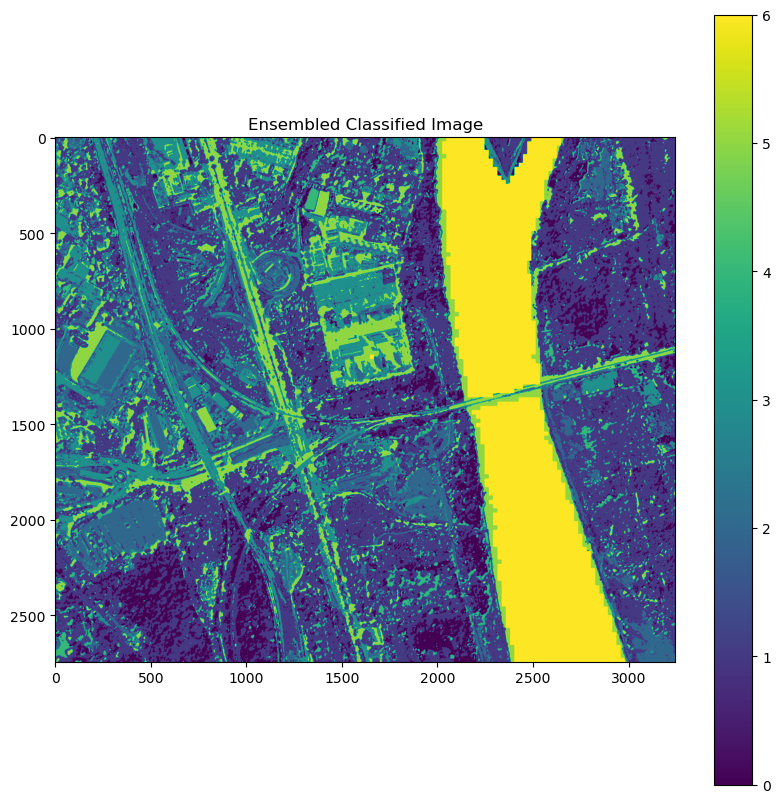

In [4]:
import matplotlib.pyplot as plt

def display_image(image_path, title):
    """Display a raster image."""
    with rasterio.open(image_path) as src:
        image = src.read(1)  # Assuming single-band TIF
    plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap='viridis')
    plt.title(title)
    plt.colorbar()
    plt.show()

display_image(output_file, "Ensembled Classified Image")